# MACHINE LEARNING MODELS FOR SENTIMENT ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [ ]:
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Below are pecialised libraries that deal with text processing.

import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
import wordcloud

# reproducibility
import tensorflow
tensorflow.random.set_seed(0)

## Import the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/appledata_sentiment.csv')

In [ ]:
df

,Unnamed: 0,review,Country,vadar compound,sentiment
0,0,i got my new macbook pro m two weeks ago and ...,UK,0.9960,positive
1,1,i bought my mac from apple directly not from a...,UK,0.9440,positive
2,2,i own over computers and it blows away my ...,UK,0.8779,positive
3,3,it s a mac once you go mac you never go back ...,UK,0.0000,negative
4,4,dead at arrival kernel error took it to t...,UK,-0.7964,negative
...,...,...,...,...,...
4053,4053,too big too heavy,US,0.0000,negative
4054,4054,fantastic laptop,US,0.5574,positive
4055,4055,no trash,US,-0.2960,negative
4056,4056,display issues again,US,0.0000,negative


## Text Cleaning

In [ ]:
# Remove punctuation
df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
df['review'] = df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(df['review'].apply(str).head())

0    i got my new macbook pro m  two weeks ago and ...
1    i bought my mac from apple directly not from a...
2    i own over    computers and it blows away my  ...
3    it s a mac once you go mac you never go back  ...
4    dead at arrival     kernel error  took it to t...
Name: review, dtype: object


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #deacc=True removes punctuations
        #data = imdb_df['review'].tolist()
data = df['review'].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['got', 'my', 'new', 'macbook', 'pro', 'two', 'weeks', 'ago', 'and', 'could', 'not', 'be', 'more', 'happy', 'with', 'it', 'this', 'machine', 'is', 'absolutely', 'incredible', 'in', 'terms', 'of', 'speed', 'looks', 'weight', 'size', 'display', 'and', 'battery', 'life', 'and', 'texture', 'it', 'feels', 'so', 'good', 'against', 'the', 'skin', 'on', 'my', 'wrists', 'as', 'type', 'and', 'basically', 'anything', 'else', 'you', 'can', 'think', 'of', 'also', 'love', 'the', 'space', 'gray', 'color', 'the', 'new', 'keyboard', 'the', 'touch', 'bar', 'and', 'the', 'larger', 'trackpad', 'there', 'are', 'so', 'many', 'options', 'to', 'customize', 'the', 'system', 'to', 'work', 'just', 'the', 'way', 'like', 'my', 'previous', 'macbook', 'was', 'the', 'model', 'and', 'it', 'still', 'works', 'today', 'but', 'after', 'years', 'it', 'became', 'too', 'slow', 'and', 'the', 'trackpad', 'had', 'trouble', 'clicking', 'so', 'after', 'ton', 'of', 'research', 'decided', 'to', 'pull', 'the', 'trigg

## Unigram, Bigram, TriGram

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])

trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<51488 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x7ff0298d9ad0>


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


trigram Phrases<51643 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


## Printing off the bigrams and trigrams

In [ ]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

(b'space', b'gray')
(b'touch', b'bar')
(b'youtube', b'videos')
(b'retina', b'display')
(b'blows', b'away')
(b'dell', b'xps')
(b'headphone', b'jack')
(b'dual', b'monitors')
(b'supports', b'single')
(b'track', b'pad')
(b'web', b'pages')
(b'absolute', b'trash')
(b'switching', b'between')
(b'google', b'chrome')
(b'learning', b'curve')
(b'media', b'could')
(b'space', b'grey')
(b'base', b'model')
(b'hard', b'drive')
(b'operating', b'system')
(b'graphic', b'design')
(b'big', b'sur')
(b'function', b'keys')
(b'highly', b'recommended')
(b'manufacturer', b'defect')
(b'blown', b'away')
(b'tabs', b'open')
(b'photo', b'editing')
(b'she', b'loves')
(b'zoom', b'calls')
(b'highly', b'recommend')
(b'light', b'weight')
(b'servicio', b'cnico')
(b'la', b'bater')
(b'buyer', b'beware')
(b'daily', b'driver')
(b'plug', b'ins')
(b'fully', b'charged')
(b'user', b'friendly')
(b'mag', b'safe')
(b'duration', b'loaded')
(b'type', b'liveseek')
(b'modal', b'window')
(b'music', b'production')
(b'audio', b'production')


In [ ]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

(b'space', b'gray')
(b'touch', b'bar')
(b'the_touch', b'bar')
(b'youtube', b'videos')
(b'retina', b'display')
(b'retina', b'display_is')
(b'blows', b'away')
(b'dell', b'xps')
(b'dual', b'monitors')
(b'supports', b'single')
(b'only_supports', b'single')
(b'supports', b'single_monitor')
(b'track', b'pad')
(b'track', b'pad_is')
(b'touch', b'bar_is')
(b'web', b'pages')
(b'absolute', b'trash')
(b'switching', b'between')
(b'google', b'chrome')
(b'media', b'could')
(b'the_media', b'could')
(b'media', b'could_not')
(b'space', b'grey')
(b'base', b'model')
(b'the_base', b'model')
(b'hard', b'drive')
(b'operating', b'system')
(b'graphic', b'design')
(b'function', b'keys')
(b'highly', b'recommended')
(b'manufacturer', b'defect')
(b'blown', b'away')
(b'tabs', b'open')
(b'tabs', b'open_at')
(b'someone', b'who')
(b'photo', b'editing')
(b'she', b'loves')
(b'and_she', b'loves')
(b'zoom', b'calls')
(b'highly', b'recommend')
(b'light', b'weight')
(b'light', b'weight_and')
(b'la', b'bater')
(b'buyer', b'b

## Lemmatisation and stop words

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

#### Removing Stopwords

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out 

In [ ]:
## Applying Function

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['get', 'new', 'macbook', 'pro', 'week', 'ago', 'happy', 'machine', 'absolutely', 'incredible', 'term', 'speed', 'look', 'weight', 'size', 'display', 'battery', 'life', 'texture', 'feel', 'good', 'skin', 'wrist', 'type', 'basically', 'think', 'love', 'space_gray', 'color', 'new', 'keyboard', 'touch_bar', 'large', 'option', 'customize', 'work', 'way', 'previous', 'macbook', 'model', 'work', 'today', 'year', 'slow', 'trackpad', 'trouble', 'click', 'ton', 'research', 'decide', 'pull', 'trigger', 'new', 'macbook', 'pro', 'chip', 'couple', 'suggestion', 'able', 'spending', 'month', 'probably', 'hour', 'research', 'new', 'model', 'buck', 'add', 'satisfaction', 'have', 'deal', 'snobby', 'nerd', 'loser', 'work', 'store', 'ask', 'rudely', 'go', 'new', 'laptop', 'appointment', 'go', 'appointment', 'want', 'store', 'love', 'apple', 'product', 'use', 'phone', 'iphone', 'macbook', 'experience', 'business', 'physical', 'apple', 'store', 'mean', 'seriously', 'need', 'appointment'

In [ ]:
def new_lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append((" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags])))
    return texts_out 

In [ ]:
## Applying Function

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
new_data_lemmatized = new_lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ', 'VERB', 'ADV'])
print('new_data_lemmatized[:1]', new_data_lemmatized[:1])

new_data_lemmatized[:1] ['get new macbook pro week ago happy machine absolutely incredible term speed look weight size display battery life texture feel good skin wrist type basically think love space_gray color new keyboard touch_bar large option customize work way previous macbook model work today year slow trackpad trouble click ton research decide pull trigger new macbook pro chip couple suggestion able spending month probably hour research new model buck add satisfaction have deal snobby nerd loser work store ask rudely go new laptop appointment go appointment want store love apple product use phone iphone macbook experience business physical apple store mean seriously need appointment buy laptop compare model ram model cost buck perform nearly task push limit reason pay want edit video super music record artist highly advance professional photographer difference day user basically work new chip mind blow blow laptop market completely water actually perform inch macbook far storag

In [ ]:
len(data_lemmatized)

4058

In [ ]:
df['new_lemmatized_reviews'] = new_data_lemmatized

In [ ]:
df.head()

,Unnamed: 0,review,Country,vadar compound,sentiment,new_lemmatized_reviews
0,0,i got my new macbook pro m two weeks ago and ...,UK,0.9960,positive,get new macbook pro week ago happy machine abs...
1,1,i bought my mac from apple directly not from a...,UK,0.9440,positive,buy directly thing amazing battery life awesom...
2,2,i own over computers and it blows away my ...,UK,0.8779,positive,computer week get battery last day use leave f...
3,3,it s a mac once you go mac you never go back ...,UK,0.0000,negative,last year
4,4,dead at arrival kernel error took it to t...,UK,-0.7964,negative,dead kernel error take apple store tell look h...


# EDA VISUALIZATIONS

# Length of words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
# Tokenize each item in the review column (i.e split into strings)
word_tokens = [word_tokenize(Reviews) for Reviews in df.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
df['length_words'] = len_tokens 

In [ ]:
#check for where we have zero length of words
df[df['length_words'] == 0]

,Unnamed: 0,review,Country,vadar compound,sentiment,new_lemmatized_reviews,length_words
217,217,,UK,0.0,negative,,0
2250,2250,,US,0.0,negative,,0


In [ ]:
#drop columns with zero length of words
#df = df.drop(labels=[217,2250], axis=0)

In [ ]:
print('The highest length of review is ',df['length_words'].max(), 'words')
print('The lowest length of review is ',df['length_words'].min(), 'word')
print('The average length of review is ',round(df['length_words'].mean()), 'words')

The highest length of review is  1258 words
The lowest length of review is  0 word
The average length of review is  52 words


UK    2033
US    2025
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

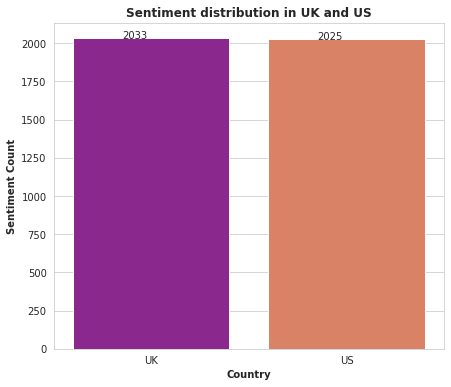

In [ ]:
fig = plt.figure(figsize = (7,6))
print(df['Country'].value_counts())
ax = sns.countplot(df['Country'], palette = 'plasma')
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Sentiment distribution in UK and US', weight='bold')
plt.ylabel('Sentiment Count', fontsize=10, weight='bold')
plt.xlabel('Country', fontsize=10, weight='bold')

UK    2033
US    2025
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

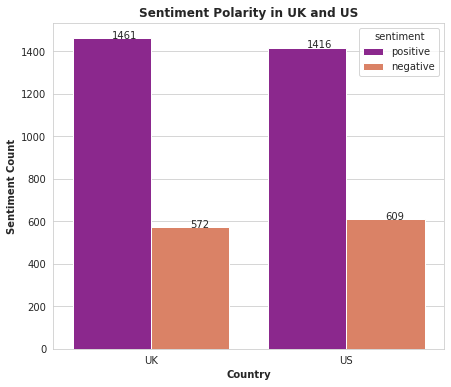

In [ ]:
fig = plt.figure(figsize = (7,6))
print(df['Country'].value_counts())
ax = sns.countplot('Country',data = df, hue ='sentiment', palette = 'plasma')
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))
plt.title('Sentiment Polarity in UK and US', weight='bold')
plt.ylabel('Sentiment Count', fontsize=10, weight='bold')
plt.xlabel('Country', fontsize=10, weight='bold')

Text(0.5, 1.0, 'Distribution of Word Length in the Apple Reviews')

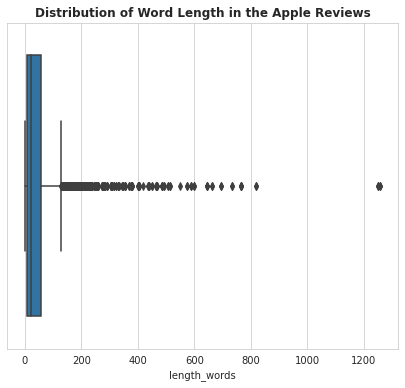

In [ ]:
fig = plt.figure(figsize = (7,6))
sns.boxplot(df['length_words'])
plt.title('Distribution of Word Length in the Apple Reviews',  weight='bold')

Text(0.5, 1.0, 'Distribution of Word Length in the Apple Reviews')

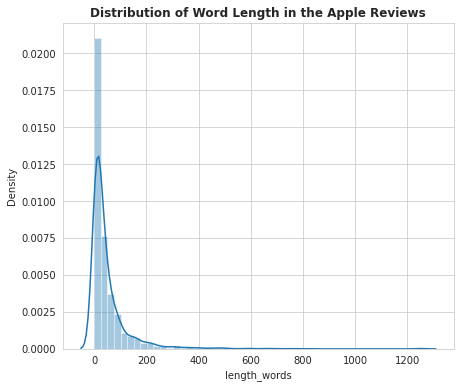

In [ ]:
fig = plt.figure(figsize = (7,6))
sns.distplot(df['length_words'])
plt.title('Distribution of Word Length in the Apple Reviews',  weight='bold')

# WORDCLOUD

In [ ]:
stopwords=set(STOPWORDS)
stopwords.update(["apple",'mac','macbook', 'pc', 'm1','air', 'pro', 'chip', 'processor', 'amazon', 'macos', 'macbooks', 'PRON'])

def loadWordCloud(words):
  text = " ".join(words)
  print ("There are {} words in the combination of all texts.".format(len(text.split(" "))))

  #generate a wordcloud
  wordcloud=WordCloud(stopwords=stopwords, max_font_size=100,
               random_state=0,width=1600,height=800,min_font_size=2,max_words=6000,relative_scaling=0.1,colormap="hsv",background_color="black"
               ).generate(text)

  #Display the Image
  plt.figure(figsize=(35,35))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  #plt.title("VISUALIZING FREQUENCY OF WORDS IN THE PRODUCT(APPLE M1) REVIEW USING WORDCLOUD")
  plt.show()

In [ ]:
neg_review = df[df['sentiment'] == 'negative']
pos_review = df[df['sentiment'] == 'positive']

In [ ]:
text_neg = loadWordCloud(neg_review['new_lemmatized_reviews'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
text_pos = loadWordCloud(pos_review['new_lemmatized_reviews'])

Output hidden; open in https://colab.research.google.com to view.

# visualizing wordcloud in each country

In [ ]:
UK_review = df[df['Country'] == 'UK']
US_review = df[df['Country'] == 'US']

In [ ]:
text_UK = loadWordCloud(UK_review['new_lemmatized_reviews'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
text_Us = loadWordCloud(US_review['new_lemmatized_reviews'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# def getWordCloud(hashtags):
#     # Read the whole text.
#     text = ' '.join(hashtags)
#     # Generate a word cloud image
#     wordcloud = WordCloud().generate(text)
#     # Display the generated image:
#     # the matplotlib way:
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     # lower max_font_size
#     wordcloud = WordCloud(max_font_size=40).generate(text)
#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.savefig('wordcloud_all.pdf', dpi=500)
#     plt.show()

In [ ]:
# s = []
# for l in data_lemmatized:
#     t = ' '.join(l)
#     s.append(t)

In [ ]:
# getWordCloud(s)

# Creating vocab size of lemmatised reviews

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(df['new_lemmatized_reviews'])
vocab_size = len(tok.word_index) + 1

tok.word_index

{'laptop': 1,
 'apple': 2,
 'macbook': 3,
 'work': 4,
 'battery': 5,
 'great': 6,
 'love': 7,
 'good': 8,
 'buy': 9,
 'use': 10,
 'screen': 11,
 'new': 12,
 'fast': 13,
 'life': 14,
 'product': 15,
 'get': 16,
 'time': 17,
 'need': 18,
 'pro': 19,
 'purchase': 20,
 'year': 21,
 'thing': 22,
 'day': 23,
 'issue': 24,
 'old': 25,
 'quality': 26,
 'air': 27,
 'look': 28,
 'come': 29,
 'chip': 30,
 'go': 31,
 'run': 32,
 'port': 33,
 'keyboard': 34,
 'price': 35,
 'usb': 36,
 'amazing': 37,
 'easy': 38,
 'long': 39,
 'machine': 40,
 'light': 41,
 'want': 42,
 'window': 43,
 'try': 44,
 'touch': 45,
 'well': 46,
 'far': 47,
 'charge': 48,
 'think': 49,
 'return': 50,
 'model': 51,
 'video': 52,
 'month': 53,
 'camera': 54,
 'problem': 55,
 'hour': 56,
 'speed': 57,
 'nice': 58,
 'know': 59,
 'app': 60,
 'fan': 61,
 'lot': 62,
 'super': 63,
 'performance': 64,
 'money': 65,
 'start': 66,
 'take': 67,
 'little': 68,
 'software': 69,
 'happy': 70,
 'feel': 71,
 'make': 72,
 'perfect': 73,
 'ex

## SENTIMENT ANALYSIS

### Splitting data into training set and test set

In [ ]:
data_lemmatized = [str (item) for item in data_lemmatized]

In [ ]:
data_lemmatized

["['get', 'new', 'macbook', 'pro', 'week', 'ago', 'happy', 'machine', 'absolutely', 'incredible', 'term', 'speed', 'look', 'weight', 'size', 'display', 'battery', 'life', 'texture', 'feel', 'good', 'skin', 'wrist', 'type', 'basically', 'think', 'love', 'space_gray', 'color', 'new', 'keyboard', 'touch_bar', 'large', 'option', 'customize', 'work', 'way', 'previous', 'macbook', 'model', 'work', 'today', 'year', 'slow', 'trackpad', 'trouble', 'click', 'ton', 'research', 'decide', 'pull', 'trigger', 'new', 'macbook', 'pro', 'chip', 'couple', 'suggestion', 'able', 'spending', 'month', 'probably', 'hour', 'research', 'new', 'model', 'buck', 'add', 'satisfaction', 'have', 'deal', 'snobby', 'nerd', 'loser', 'work', 'store', 'ask', 'rudely', 'go', 'new', 'laptop', 'appointment', 'go', 'appointment', 'want', 'store', 'love', 'apple', 'product', 'use', 'phone', 'iphone', 'macbook', 'experience', 'business', 'physical', 'apple', 'store', 'mean', 'seriously', 'need', 'appointment', 'buy', 'laptop', 

In [ ]:
df

,Unnamed: 0,review,Country,vadar compound,sentiment,new_lemmatized_reviews,length_words
0,0,i got my new macbook pro m two weeks ago and ...,UK,0.9960,positive,get new macbook pro week ago happy machine abs...,587
1,1,i bought my mac from apple directly not from a...,UK,0.9440,positive,buy directly thing amazing battery life awesom...,75
2,2,i own over computers and it blows away my ...,UK,0.8779,positive,computer week get battery last day use leave f...,122
3,3,it s a mac once you go mac you never go back ...,UK,0.0000,negative,last year,22
4,4,dead at arrival kernel error took it to t...,UK,-0.7964,negative,dead kernel error take apple store tell look h...,26
...,...,...,...,...,...,...,...
4053,4053,too big too heavy,US,0.0000,negative,,4
4054,4054,fantastic laptop,US,0.5574,positive,fantastic laptop,2
4055,4055,no trash,US,-0.2960,negative,trash,2
4056,4056,display issues again,US,0.0000,negative,display issue,3


In [ ]:
y = df['sentiment']

In [ ]:
y

0       positive
1       positive
2       positive
3       negative
4       negative
          ...   
4053    negative
4054    positive
4055    negative
4056    negative
4057    positive
Name: sentiment, Length: 4058, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
#new_y = y[0:500]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # I changed the features to pick up 20500 important words from X
X = cv.fit_transform(data_lemmatized).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
NB_training_accuracy = accuracy_score(y_train, clfNB.predict(X_train))
NB_training_accuracy

0.8535688005886681

In [ ]:
NBy_pred = clfNB.predict(X_test)
print(np.concatenate((NBy_pred.reshape(len(NBy_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
NBcm = confusion_matrix(y_test, NBy_pred)
print(NBcm)
NBscore = accuracy_score(y_test, NBy_pred)
NBscore

[[200 179]
 [ 43 918]]


0.8343283582089552

In [ ]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix, precision_score, recall_score
import time
from sklearn.naive_bayes import MultinomialNB

import os, sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#models

dtc = DecisionTreeClassifier(random_state=10)
svm = SVC(kernel='linear', gamma=1)
gnb = GaussianNB()
rfc = RandomForestClassifier()
log = LogisticRegression()
knc = KNeighborsClassifier(n_neighbors=10)
sgd = SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet")
clfNB = MultinomialNB()

________________________________________________________________________________
Training ...
Model: DecisionTreeClassifier
train time: 1.121s
Training Accuracy is: 0.976

test time:  0.012s
Valitation accuracy:   0.907
F1_score:   0.889
Precision_score:   0.880
Recall_score:   0.900


<Figure size 864x576 with 0 Axes>

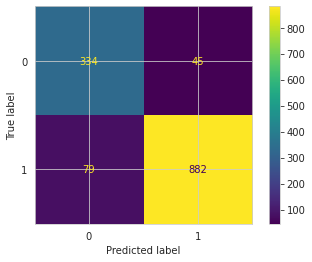

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: SVC
train time: 8.587s
Training Accuracy is: 0.962

test time:  3.199s
Valitation accuracy:   0.901
F1_score:   0.883
Precision_score:   0.870
Recall_score:   0.901


<Figure size 864x576 with 0 Axes>

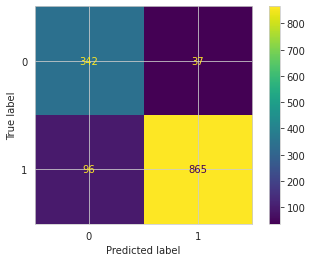

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: RandomForestClassifier
train time: 3.848s
Training Accuracy is: 0.976

test time:  0.167s
Valitation accuracy:   0.912
F1_score:   0.891
Precision_score:   0.892
Recall_score:   0.890


<Figure size 864x576 with 0 Axes>

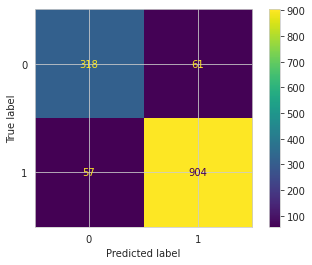

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: GaussianNB
train time: 0.167s
Training Accuracy is: 0.718

test time:  0.057s
Valitation accuracy:   0.628
F1_score:   0.623
Precision_score:   0.679
Recall_score:   0.712


<Figure size 864x576 with 0 Axes>

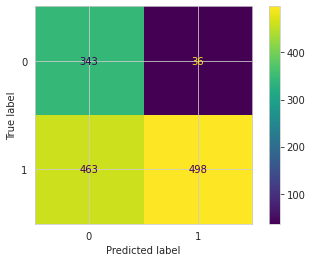

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: LogisticRegression
train time: 0.882s
Training Accuracy is: 0.958

test time:  0.021s
Valitation accuracy:   0.908
F1_score:   0.890
Precision_score:   0.881
Recall_score:   0.900


<Figure size 864x576 with 0 Axes>

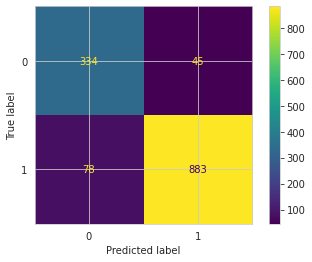

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: KNeighborsClassifier
train time: 0.001s
Training Accuracy is: 0.827

test time:  0.966s
Valitation accuracy:   0.761
F1_score:   0.731
Precision_score:   0.723
Recall_score:   0.759


<Figure size 864x576 with 0 Axes>

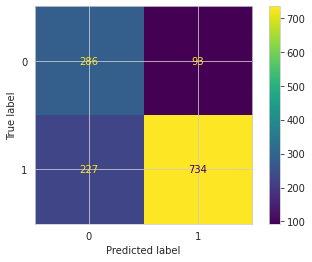

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: SGDClassifier
train time: 3.065s
Training Accuracy is: 0.968

test time:  0.013s
Valitation accuracy:   0.907
F1_score:   0.890
Precision_score:   0.879
Recall_score:   0.904


<Figure size 864x576 with 0 Axes>

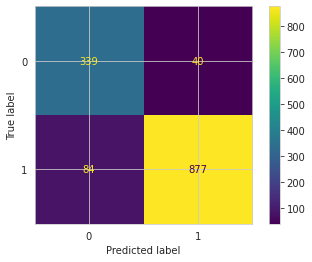

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
________________________________________________________________________________
Training ...
Model: MultinomialNB
train time: 0.188s
Training Accuracy is: 0.854

test time:  0.020s
Valitation accuracy:   0.834
F1_score:   0.768
Precision_score:   0.830
Recall_score:   0.741


<Figure size 864x576 with 0 Axes>

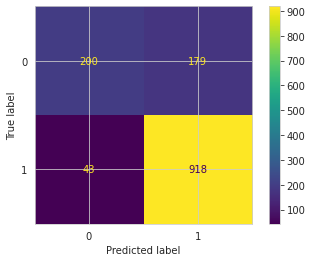

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
results = []
def model_metrics(_):
    print("_" * 80)
    clf_descr = str(_).split("(")[0]
    print('Training ...\nModel: %s' % clf_descr)
    
    t0 = time.time()
    _.fit(X_train, y_train)
    train_time = time.time() - t0
    print("train time: %0.3fs" % train_time)
    t_score=_.score(X_train, y_train)
    print('Training Accuracy is: %0.3f' % t_score)
    
    t0 = time.time()
    pred = _.predict(X_test)
    test_time = time.time() - t0
    print("\ntest time:  %0.3fs" % test_time)
    
    v_score = metrics.accuracy_score(y_test, pred)
    print("Valitation accuracy:   %0.3f" % v_score)
    
    f_score = metrics.f1_score(y_test, pred, average='macro')
    print("F1_score:   %0.3f" % f_score)

    p_score = metrics.precision_score(y_test, pred, average='macro')
    print("Precision_score:   %0.3f" % p_score)
    
    r_score = metrics.recall_score(y_test, pred, average='macro')
    print("Recall_score:   %0.3f" % r_score)

    plt.figure(figsize = (12,8))
    plot_confusion_matrix(_, X_test, y_test)
    plt.show()
    print("- - " * 20)

    return clf_descr, t_score, v_score, f_score, p_score, r_score, train_time, test_time

model_list2=[dtc, svm, rfc, gnb, log, knc, sgd, clfNB]

for _ in model_list2:
    results.append(model_metrics(_))


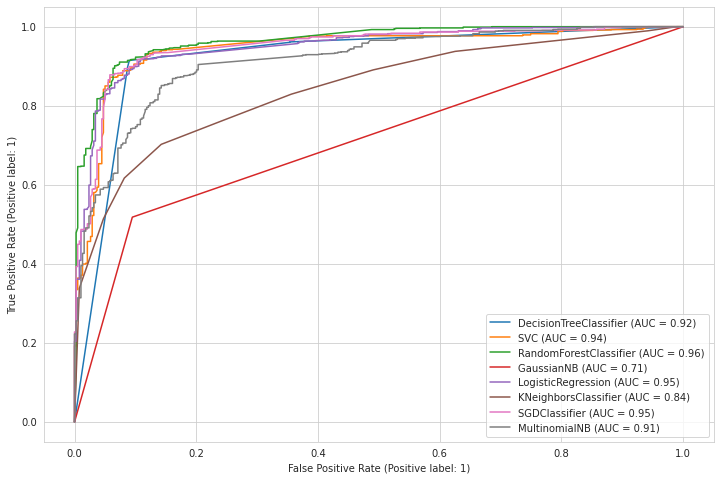

In [ ]:
fig = plt.figure(figsize = (12,8))
from sklearn.metrics import plot_roc_curve

classifiers = [dtc, svm, rfc, gnb, log, knc, sgd, clfNB]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [ ]:
from sklearn.metrics import plot_roc_curve

classifiers = [dtc, svm, rfc, gnb, log, knc, sgd, clfNB]
for i in classifiers:
    classification_report(X_test, y_test)

In [ ]:
indices = np.arange(len(results))

results1 = [[x[i] for x in results] for i in range(5)]

model_names, tr_score, val_score, training_time, test_time  = results1

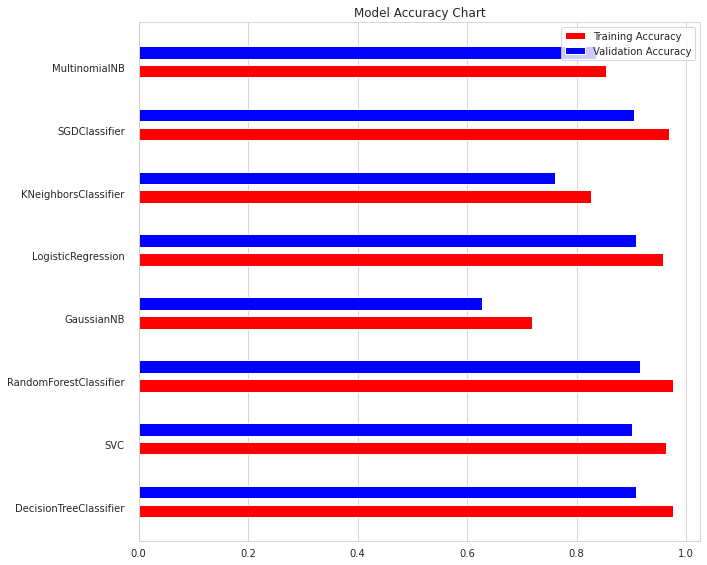

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Model Accuracy Chart")
plt.barh(indices, tr_score, 0.2, label="Training Accuracy", color="red")
plt.barh(indices+0.3, val_score, 0.2, label="Validation Accuracy", color="blue")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)

for i, c in zip(indices, model_names):
    plt.text(-0.025, i, c, horizontalalignment='right')

plt.show()

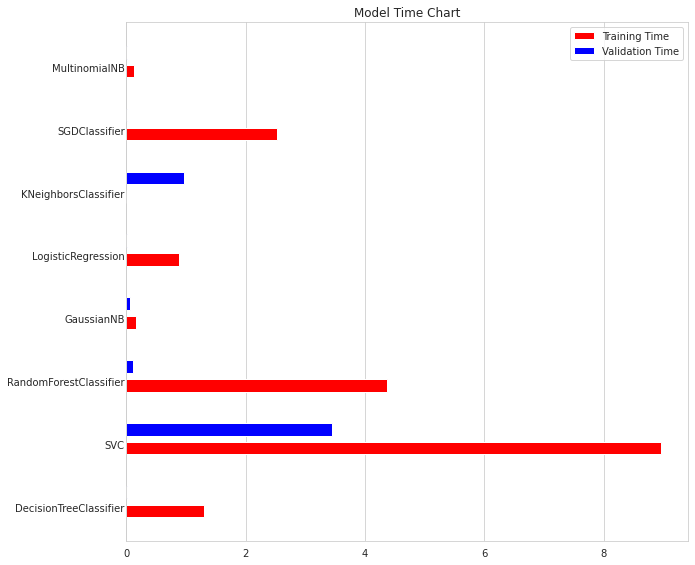

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Model Time Chart")
plt.barh(indices, training_time, 0.2, label="Training Time", color="red")
plt.barh(indices+0.3, test_time, 0.2, label="Validation Time", color="blue")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)

for i, c in zip(indices, model_names):
    plt.text(-0.025, i, c, horizontalalignment='right')

plt.show()

In [ ]:
# from sklearn import datasets, linear_model
# from sklearn.model_selection import cross_val_score
# lasso = linear_model.Lasso()
# print(cross_val_score(lasso, X, y, cv=5))